# In this program we have created annimation with camera snap. Another easy method to create annimated visualization

### author: Chandrima Chakrabarty (chakrabartychandrima91@gmail.com)

C:\Users\This-PC\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'frames', 'interval', 'blit'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
C:\Users\This-PC\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1366: UserWarning: The following kwargs were not used by contour: 'color'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
C:\Users\This-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


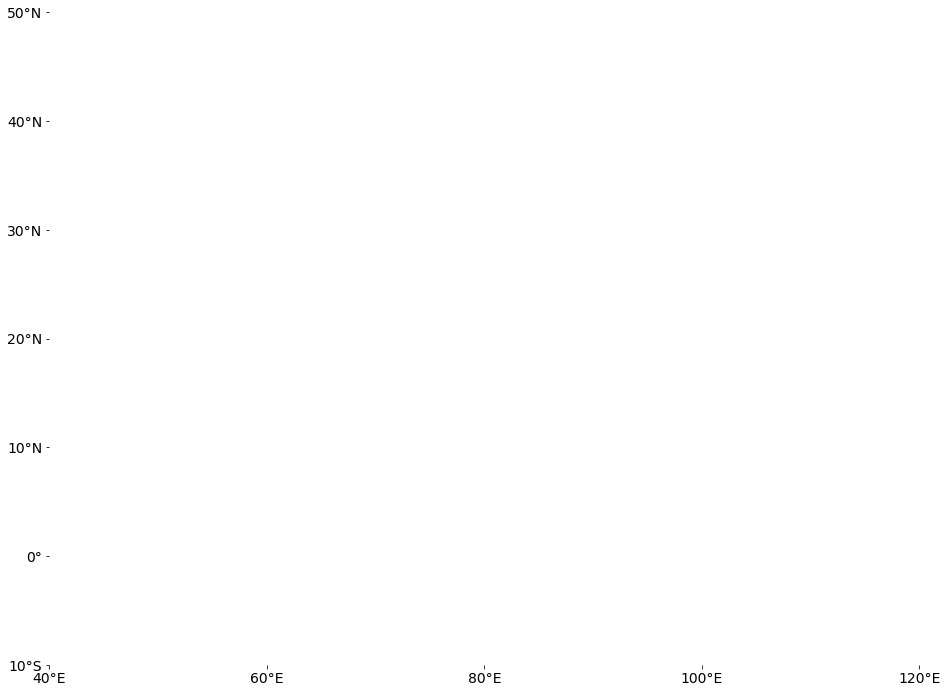

In [1]:
# Meteorological all parameters (Animation)

##### This plot contains animtion of rain,wind(u,v,w) and pressure over india in same plot in different years and months. from global data region is been extracted. 

##### ***********important: quivar plot, plot with multiple parameters, animation with camera snap,**************

import os
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.cm import get_cmap
from scipy.optimize import curve_fit
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
import matplotlib.patches as patches
import matplotlib.dates as mdates

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


import matplotlib.animation as animation
from celluloid import Camera #for animation
from matplotlib.animation import ArtistAnimation

rain=xr.open_dataset('D:/pai/data/imdrainfall_MERGED_DATA_S_ASIA_1982_2019.nc')
u = xr.open_dataset('D:/pai/data/ncepreanalysis_uwnd.mon.mean_jan1948topresent.nc')
v = xr.open_dataset('D:/pai/data/ncepreanalysis_vwind.mon.mean_jan1948topresent.nc')
PP= xr.open_dataset('D:/pai/data/ncepreanalysis_pres.surface.mon.mean.nc')

ncep_u=u.sel(time=slice('1982-01','2019-12'))           #slicing years from original data
ncep_v=v.sel(time=slice('1982-01','2019-12'))
SP=PP.sel(time=slice('1982-01','2019-12'))

lon_w = ncep_u.lon
lat_w = ncep_u.lat
lon_r=rain.LONGITUDE
lat_r=rain.LATITUDE
p=SP.pres/100
lon_p = SP.lon
lat_p = SP.lat

fig=plt.figure(figsize=[20,12])         ##figure size define
cmap1 = get_cmap('YlGnBu') 
img_extent =[40, 120, -10, 50]           #selecting lat lon
camera = Camera(fig)                     #camera for animaion
images_rain=[]
images_pres=[]
title = []

for i in range(5):
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())     #subplot 1 with only 1 frame ,plot projecttion
    ax.set_extent(img_extent, ccrs.PlateCarree()) 
    levels=np.arange(0,150,10)
    shrink=0.85
    #ax.set_extent(img_extent, ccrs.PlateCarree())
    ax.coastlines()
    

   # ax.set_title("Histograms for " + str(rain.time[i]))
    
    
    
    ax.set_xticks([40,60,80,100,120], crs=ccrs.PlateCarree())       
    ax.set_yticks([-10, 0,10, 20,30,40, 50], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(axis='both',labelsize=14)
    
    c = ax.contourf(lon_r, lat_r, rain.rf[i,:,:], extent=img_extent, cmap=cmap1, #rain contour plot for different months 
            transform=ccrs.PlateCarree(),frames=100, interval=100, blit=True)
    images_rain.append(c.collections)
    
    cp = ax.contour(lon_p,lat_p,p[i,:,:], 20,extent=img_extent,color='black')       #pressure contour plot
    plt.clabel(cp, inline=True, fontsize=15)
    images_pres.append(cp.collections)
    
    q = ax.quiver(lon_w[::2],lat_w[::2],ncep_u.uwnd[i,0,::2,::2],               # u v wind quiver plot
               ncep_v.vwnd[i,0,::2,::2],color='r',scale=150)
    
    #plt.colorbar(c,pad=0.01,ax=ax,shrink=shrink,orientation='vertical')
    camera.snap()                                                             #taking every months plot's snap

animation = camera.animate()
animation.save('2dmetpara_animation.gif', writer = 'imagemagick')         #save files



